In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv("./datas/Marvel Vs DC NEW.csv")

In [208]:
df

,ID,Movie,Genre,RunTime,Description,IMDB_Score,Company,Company_label
2,2,The Falcon and the Winter Soldier,"Action,Adventure,Drama",50,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel,1
3,3,WandaVision,"Action,Comedy,Drama",350,Blends the style of classic sitcoms with the M...,8.1,Marvel,1
5,5,Black Widow,"Action,Adventure,Sci-Fi",133,A film about Natasha Romanoff in her quests be...,0.0,Marvel,1
6,6,Avengers: Endgame,"Action,Adventure,Drama",181,After the devastating events of Avengers: Infi...,8.4,Marvel,1
7,7,Guardians of the Galaxy,"Action,Adventure,Comedy",121,A group of intergalactic criminals must pull t...,8.0,Marvel,1
...,...,...,...,...,...,...,...,...
1685,1685,DC's Legends of Tomorrow,"Action,Adventure,Drama",42,"Worlds lived, worlds died. Nothing will ever b...",8.5,DC,0
1686,1686,Supergirl,"Action,Adventure,Drama",42,"In the wake of Lex Luthor's return, the show f...",8.3,DC,0
1687,1687,Supergirl,"Action,Adventure,Drama",42,Kara comes face to face with Red Daughter and ...,8.1,DC,0
1688,1688,Supergirl,"Action,Adventure,Drama",42,Kara and Lena head to Kaznia to hunt down Lex....,7.4,DC,0


In [209]:
df = df.drop(['Year'], axis=1)

KeyError: "['Year'] not found in axis"

In [ ]:
df.isnull().sum()   

ID             0
Movie          0
Genre          7
RunTime        0
Description    0
IMDB_Score     0
dtype: int64

In [ ]:
# null인 행 지우기
df = df.dropna(subset=['Genre'])
print(df.isnull().sum())

ID             0
Movie          0
Genre          0
RunTime        0
Description    0
IMDB_Score     0
dtype: int64


In [210]:
# RunTime이 (String)0인 행 지우기
df = df[df['RunTime'] != '0']

# IMDB_Score가 0인 행의 개수, 11개만 있으므로 평점이 입력되지 않은게 아니라 평점을 0.0으로 입력한 것으로 간주
print(df[df['IMDB_Score'] == 0.0]) 


    ID        Movie                    Genre RunTime  \
5    5  Black Widow  Action,Adventure,Sci-Fi     133   
36  36      Hawkeye   Action,Adventure,Crime      60   

                                          Description  IMDB_Score Company  \
5   A film about Natasha Romanoff in her quests be...         0.0  Marvel   
36  Series based on the Marvel Comics superhero Ha...         0.0  Marvel   

    Company_label  
5               1  
36              1  


In [211]:
# 데이터 정제
df.columns = df.columns.str.strip()
df['IMDB_Score'] = pd.to_numeric(df['IMDB_Score'], errors='coerce')
df['RunTime'] = df['RunTime'].str.replace(' min', '', regex=False)

In [212]:
# 여기서 Marvel과 DC 데이터 분류하기

marvel = [
    'The Falcon and the Winter Soldier', 'WandaVision', 'Black Widow','Avengers: Endgame', 'Guardians of the Galaxy', 'Spider-Man: Far from Home',
    'Thor: Ragnarok', 'Avengers: Infinity War', 'Black Panther','Captain Marvel', 'Spider-Man: Homecoming', 'Avengers: Age of Ultron',
    'Captain America: The First Avenger', 'Guardians of the Galaxy Vol. 2','Thor', 'Iron Man', 'Captain America: Civil War', 'The Avengers',
    'Doctor Strange', 'Ant-Man', 'Captain America: The Winter Soldier','Iron Man 3', 'Thor: The Dark World', 'Iron Man 2', 'Spider-Man 3',
    'Ant-Man and the Wasp', 'The Incredible Hulk', 'Hawkeye', 'Jessica Jones', 'Luke Cage', 'Agents of S.H.I.E.L.D.', 'The Punisher',
    'Marvel Studios: Legends', 'Marvel Studios: Assembled','Iron Man: Armored Adventures', 'Marvel One-Shot: Agent Carter',
    'Marvel One-Shot: Item 47', 'Marvel One-Shot: The Consultant','The Invincible Iron Man', 'Wolverine', 'X-Men: Evolution',
    'Eternals', 'Loki', 'Spider-Man: No Way Home', 'Thor: Love and Thunder', 'Shang-Chi and the Legend of the Ten Rings', 'Doctor Strange in the Multiverse of Madness', 'What If...?',
    'Black Panther: Wakanda Forever','Guardians of the Galaxy Vol. 3','The Marvels','Moon Knight','Ms. Marvel','She-Hulk','Secret Invasion','Deadpool 3','Fantastic Four','Ironheart',
    'Armor Wars','I Am Groot','Echo','The Guardians of the Galaxy Holiday Special'
]

dc = [
    'Wonder Woman 1984', 'Joker', 'The Dark Knight', 'Watchmen', 'Suicide Squad', 'The Dark Knight Rises', 'Doom Patrol', 'Aquaman','Man of Steel', 'Shazam!', 'Batman v Superman: Dawn of Justice',
    'Batman Begins', 'Batman', 'Batman & Robin', 'Constantine', 'Batman Forever', 'Superman', 'Justice Society: World War II',
    'Green Lantern', 'Batman Returns', 'Superman Returns','Arrow', 'Gotham', 'Smallville', 'The Flash', 'Supergirl',
    'Young Justice', 'Teen Titans', 'Krypton', 'Justice League Unlimited','Justice League', 'Catwoman', 'Batman Beyond', 'Swamp Thing',
    'Batman: The Animated Series', 'Superman: The Animated Series',"DC's Legends of Tomorrow", 'Black Lightning', 'The Suicide Squad','The Batman','The Sandman','Batman: The Long Halloween, Part One',
    'Justice League Part Two','Batman: Arkham Asylum','Green Lantern Corps','Gotham City Sirens','Deadshot','Deathstroke','Zatanna',
    'Batman: Knightfall','DC Fandome','100 Bullets','Aquaman: Battle for Atlantis','The Suicide Squad','The Batman','The Sandman','Batman: The Long Halloween, Part One',
    'Justice League Part Two','Batman: Arkham Asylum','Green Lantern Corps','Gotham City Sirens','Deadshot','Deathstroke','Zatanna','Batman: Knightfall','DC Fandome','100 Bullets','Aquaman: Battle for Atlantis'
]
company = []
for row in df['Movie']:
    if row in marvel:
        company.append('Marvel')
    elif row in dc:
        company.append('DC')
    else:
        company.append('-1')
        
df['Company'] = company
df = df[df['Company'] != '-1']

print(df)

        ID                              Movie                    Genre  \
2        2  The Falcon and the Winter Soldier   Action,Adventure,Drama   
3        3                        WandaVision      Action,Comedy,Drama   
5        5                        Black Widow  Action,Adventure,Sci-Fi   
6        6                  Avengers: Endgame   Action,Adventure,Drama   
7        7            Guardians of the Galaxy  Action,Adventure,Comedy   
...    ...                                ...                      ...   
1685  1685           DC's Legends of Tomorrow   Action,Adventure,Drama   
1686  1686                          Supergirl   Action,Adventure,Drama   
1687  1687                          Supergirl   Action,Adventure,Drama   
1688  1688                          Supergirl   Action,Adventure,Drama   
1689  1689                          Supergirl   Action,Adventure,Drama   

     RunTime                                        Description  IMDB_Score  \
2         50  Following the even

In [213]:
print(df[df['Company'] == '-1'].count())

ID               0
Movie            0
Genre            0
RunTime          0
Description      0
IMDB_Score       0
Company          0
Company_label    0
dtype: int64


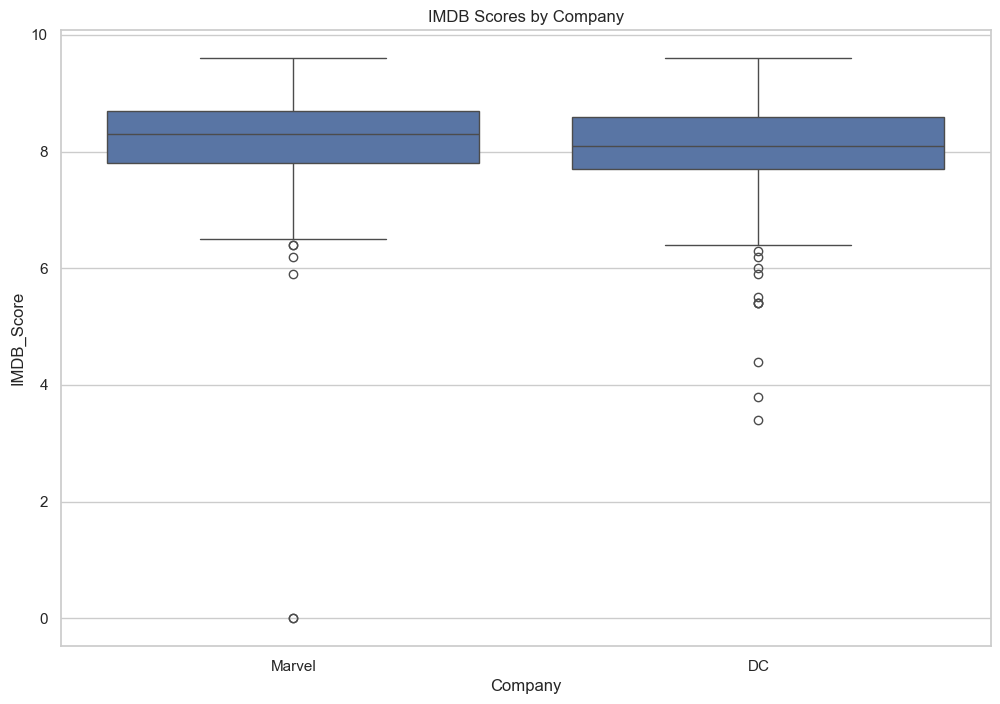

In [214]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D

# 회사별 IMDB 점수 분포
plt.figure(figsize=(12, 8))
sns.boxplot(x='Company', y='IMDB_Score', data=df)
plt.title('IMDB Scores by Company')
plt.show()

C:\Users\manun\AppData\Local\Temp\ipykernel_39336\1249720310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Company', y='IMDB_Score', data=df,


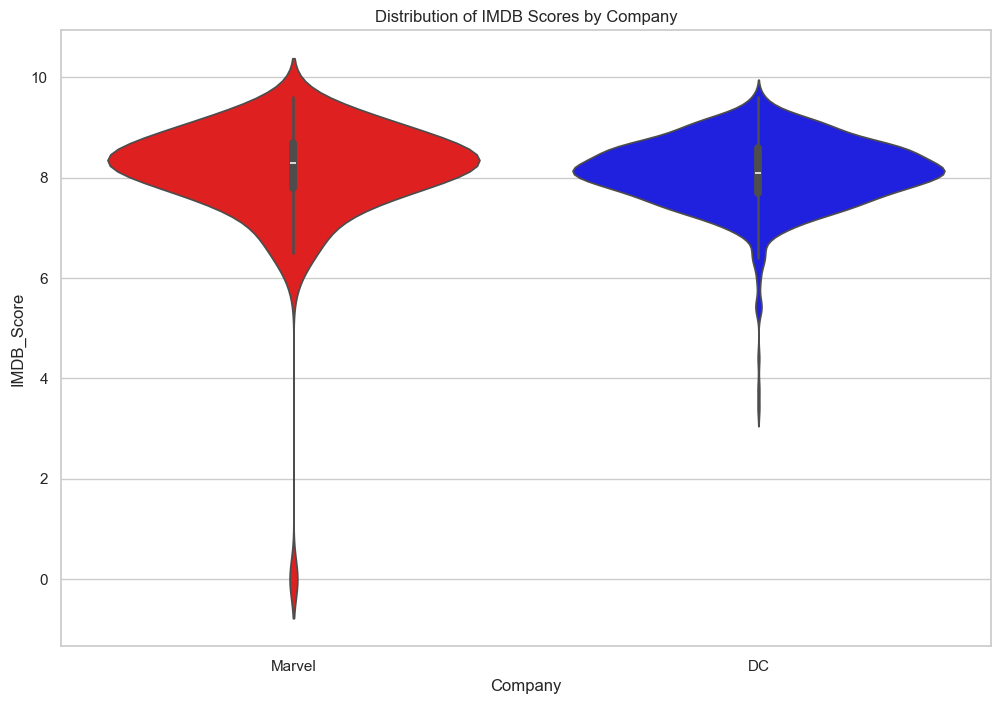

In [215]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Company', y='IMDB_Score', data=df,
               palette={'Marvel':'#FF0000',
                        'DC': "#0000FF",
                        '-1': "#808080"
                        }
               )
plt.title('Distribution of IMDB Scores by Company')
plt.show()

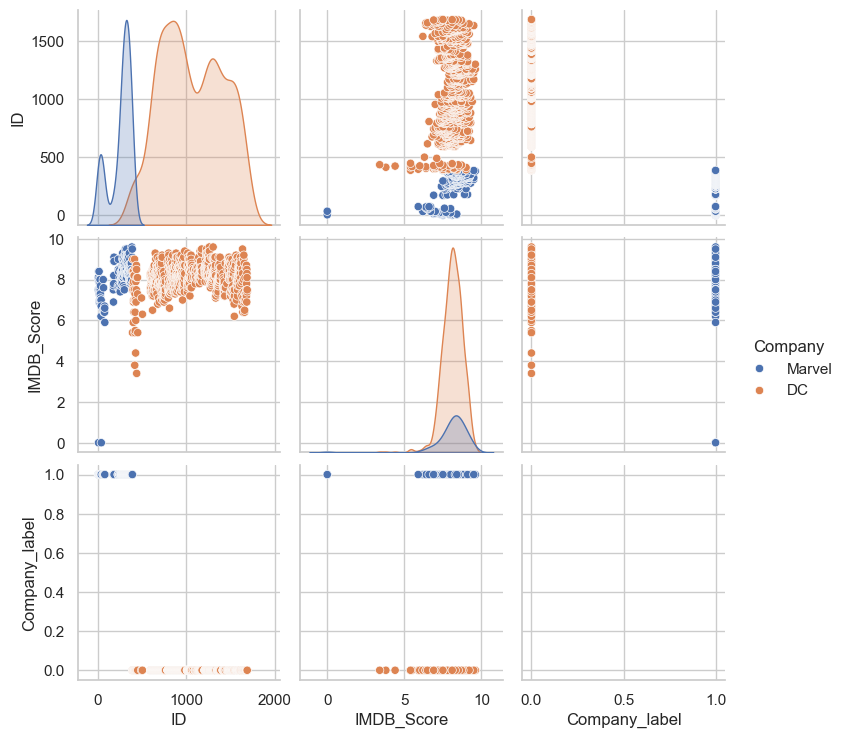

In [216]:
# pairplot 생성
sns.pairplot(df, hue='Company')
plt.show()

In [217]:
df

,ID,Movie,Genre,RunTime,Description,IMDB_Score,Company,Company_label
2,2,The Falcon and the Winter Soldier,"Action,Adventure,Drama",50,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel,1
3,3,WandaVision,"Action,Comedy,Drama",350,Blends the style of classic sitcoms with the M...,8.1,Marvel,1
5,5,Black Widow,"Action,Adventure,Sci-Fi",133,A film about Natasha Romanoff in her quests be...,0.0,Marvel,1
6,6,Avengers: Endgame,"Action,Adventure,Drama",181,After the devastating events of Avengers: Infi...,8.4,Marvel,1
7,7,Guardians of the Galaxy,"Action,Adventure,Comedy",121,A group of intergalactic criminals must pull t...,8.0,Marvel,1
...,...,...,...,...,...,...,...,...
1685,1685,DC's Legends of Tomorrow,"Action,Adventure,Drama",42,"Worlds lived, worlds died. Nothing will ever b...",8.5,DC,0
1686,1686,Supergirl,"Action,Adventure,Drama",42,"In the wake of Lex Luthor's return, the show f...",8.3,DC,0
1687,1687,Supergirl,"Action,Adventure,Drama",42,Kara comes face to face with Red Daughter and ...,8.1,DC,0
1688,1688,Supergirl,"Action,Adventure,Drama",42,Kara and Lena head to Kaznia to hunt down Lex....,7.4,DC,0


     Company  IMDB_Score  Company_label  class
2     Marvel         7.5              1      1
3     Marvel         8.1              1      1
5     Marvel         0.0              1      0
6     Marvel         8.4              1      1
7     Marvel         8.0              1      1
...      ...         ...            ...    ...
1685      DC         8.5              0      0
1686      DC         8.3              0      0
1687      DC         8.1              0      0
1688      DC         7.4              0      0
1689      DC         7.5              0      0

[1028 rows x 4 columns]


C:\Users\manun\AppData\Local\Temp\ipykernel_39336\1244465427.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['Company_label'] = labelEncoder.fit_transform(df['Company']) # Marvel은 1, DC는 0으로 인코딩
C:\Users\manun\AppData\Local\Temp\ipykernel_39336\1244465427.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['class'] = k_means.fit_predict(X)


(-1.0, 2.0)

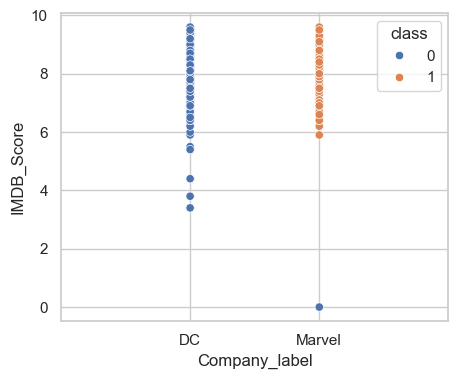

In [249]:
# # marvel, dc 군집화
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler
# # pca를 통해 고차원의 Genre를 차원 축소한 후에 Scatter처럼 표시 후 Genre별 고유 색상 입히기

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# transform_genre = pca.fit_transform(df['Genre'])

# Genre 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

genre_unique = set()
genres = []
for i in df['Genre']:
    genre = i.split(',')
    genre_unique.update(genre)

labelEncoder = LabelEncoder()

df_class = df[['Company', 'IMDB_Score']]
df_class['Company_label'] = labelEncoder.fit_transform(df['Company']) # Marvel은 1, DC는 0으로 인코딩

df_class
X = df_class[['Company_label', 'IMDB_Score']]
X

k_means = KMeans(n_clusters=2, random_state=85)
df_class['class'] = k_means.fit_predict(X)
print(df_class)

plt.figure(figsize=(5,4
))
sns.scatterplot(x='Company_label',
                y='IMDB_Score',
                hue='class',
                data=df_class,
                )
plt.grid(1)
plt.xticks([0, 1], ['DC', 'Marvel'])
plt.xlim(-1, 2)

Text(0, 0.5, 'SCORE')

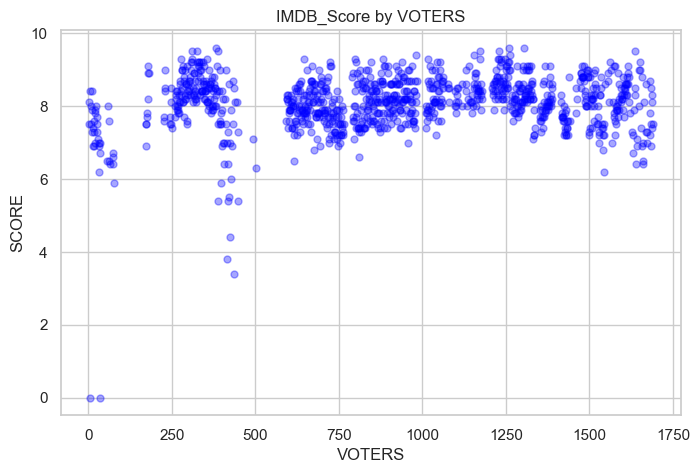

In [243]:
# 영화 평점 매기기 전 데이터에서, 영화별 IMDB_Score 점수를 scatter로 표시(그룹화가 목적)
plt.figure(figsize=(8, 5))
plt.scatter(
    df['ID'],
    df['IMDB_Score'],
    alpha=0.35,
    color='blue',
    s=25
)
plt.title('IMDB_Score by VOTERS')
plt.xlabel('VOTERS')
plt.ylabel('SCORE')

In [170]:
import seaborn as sns
from matplotlib import poplot as plt
from mpl_toolkits.mplot3d import Axes3D

ImportError: cannot import name 'poplot' from 'matplotlib' (c:\Users\manun\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\__init__.py)

In [ ]:
movie_score_group_mean = df.groupby('Movie')['IMDB_Score'].mean()
movie_score_group_mean

Movie
A Sneek Peak at Justice League: Doom                6.000000
Adventures of Superman                              7.700000
Agent Cody Banks                                    5.100000
Agents of S.H.I.E.L.D.                              8.588043
Ant-Man                                             7.300000
                                                      ...   
Wonder Woman: A Subversive Dream                    7.100000
Wonder Woman: The Ultimate Feminist Icon            7.700000
X-Men: Evolution                                    7.400000
You Will Believe: The Cinematic Saga of Superman    7.900000
Young Justice                                       8.729167
Name: IMDB_Score, Length: 245, dtype: float64

In [ ]:
# 영화별 평점 평균 구하기기
movie_score_group = df.groupby('Movie')['IMDB_Score'].mean().sort_values(ascending=True)
movie_score_group
length = range(len(movie_score_group))

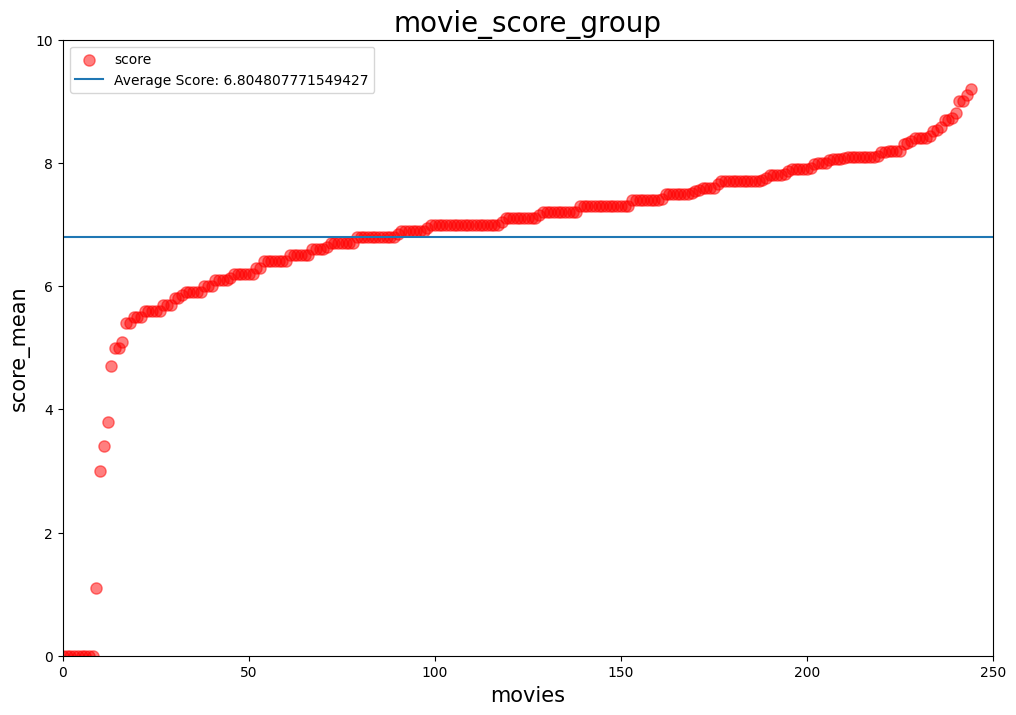

평균 평점: 6.804807771549427
최고 평점: 9.2, 영화 : Duck Dodgers
최저 평점: 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 영화 평점 평균을 모두 표시한 것
plt.figure(figsize=(12, 8))
plt.scatter(length, movie_score_group.values, alpha=0.5, s=65, color='red', label='score') 
plt.title('movie_score_group', fontsize=20)
plt.xlabel('movies', fontsize=15)
plt.ylabel('score_mean', fontsize=15)
plt.axhline(y=movie_score_group.mean(), linestyle='-', label=f'Average Score: {movie_score_group.mean()}')
plt.ylim(0, 10)
plt.xlim(0, 250)
plt.legend(fontsize=10, loc='upper left')
plt.show()

print(f"평균 평점: {movie_score_group.mean()}")
print(f"최고 평점: {movie_score_group.max()}, 영화 : {movie_score_group.index[244]}")
print(f"최저 평점: {movie_score_group.min()}")

In [ ]:
df_movie_score_group = pd.DataFrame(movie_score_group[-10:][:]).round(2)


C:\Users\manun\AppData\Local\Temp\ipykernel_39336\3704967198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Score',


<Axes: xlabel='IMDB_Score', ylabel='Movie'>

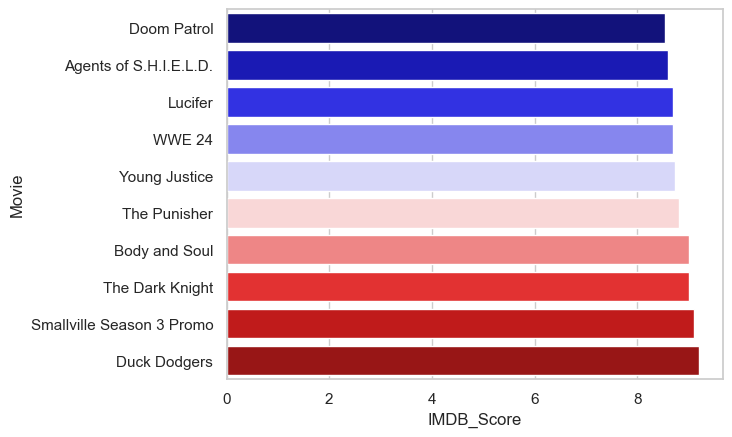

In [ ]:

# 상위 영화 10개를 뽑아서 바 차트 만들기
width = 0.5

sns.set_theme(style="whitegrid")
sns.barplot(x='IMDB_Score',
            y='Movie',
            data=pd.DataFrame(df_movie_score_group[-10:][:]),
            orient='h',
            palette='seismic'
            )

C:\Users\manun\AppData\Local\Temp\ipykernel_39336\1853719377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Score',


<Axes: xlabel='IMDB_Score', ylabel='Movie'>

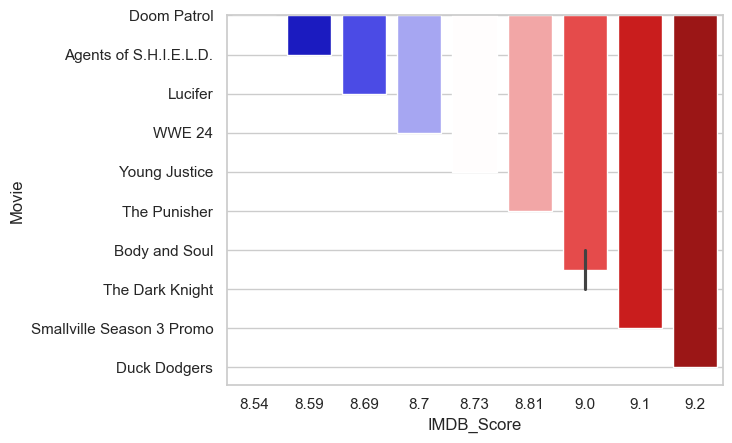

In [ ]:

# 상위 영화 10개를 뽑아서 바 차트 만들기

sns.set_theme(style="whitegrid")
sns.barplot(x='IMDB_Score',
            y='Movie',
            data=pd.DataFrame(df_movie_score_group[-10:][:]),
            orient='v',
            palette='seismic'
            )

In [ ]:
# Genre에서 ,을 ' '로 변경
df['Genre'] = df['Genre'].str.replace(',', ' ')
df.head

<bound method NDFrame.head of         ID                              Movie                    Genre  \
2        2  The Falcon and the Winter Soldier   Action Adventure Drama   
3        3                        WandaVision      Action Comedy Drama   
5        5                        Black Widow  Action Adventure Sci-Fi   
6        6                  Avengers: Endgame   Action Adventure Drama   
7        7            Guardians of the Galaxy  Action Adventure Comedy   
...    ...                                ...                      ...   
1685  1685           DC's Legends of Tomorrow   Action Adventure Drama   
1686  1686                          Supergirl   Action Adventure Drama   
1687  1687                          Supergirl   Action Adventure Drama   
1688  1688                          Supergirl   Action Adventure Drama   
1689  1689                          Supergirl   Action Adventure Drama   

     RunTime                                        Description  IMDB_Score  
2  

In [ ]:
from collections import Counter
from kiwipiepy import Kiwi

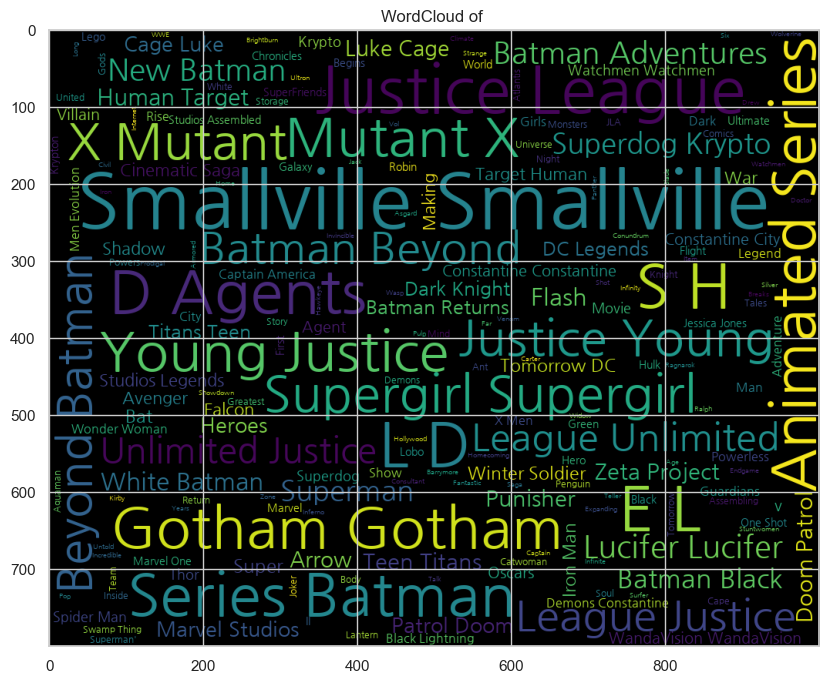

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 가장 많이 나온 영화 이름 찾기
word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    width=1000,
    height=800,
).generate(' '.join(df['Movie']))

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.title("WordCloud of ")
plt.show()

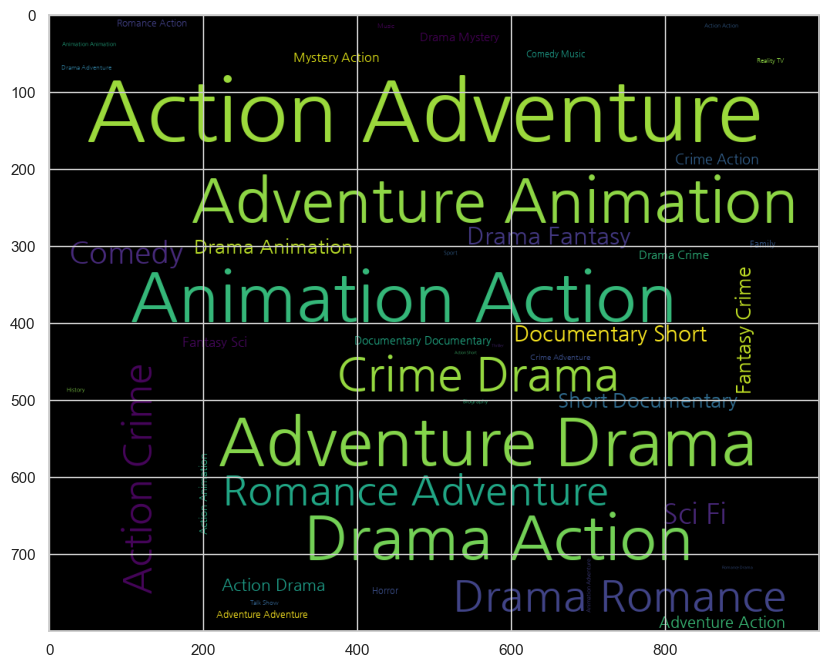

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    width=1000,
    height=800,
).generate(' '.join(df['Genre']))

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.show()

In [ ]:
# 장르와, 각 장르의 개수를 차트로!
print(df.head())

   ID                              Movie                    Genre RunTime  \
2   2  The Falcon and the Winter Soldier   Action Adventure Drama      50   
3   3                        WandaVision      Action Comedy Drama     350   
5   5                        Black Widow  Action Adventure Sci-Fi     133   
6   6                  Avengers: Endgame   Action Adventure Drama     181   
7   7            Guardians of the Galaxy  Action Adventure Comedy     121   

                                         Description  IMDB_Score  
2  Following the events of 'Avengers: Endgame,' S...         7.5  
3  Blends the style of classic sitcoms with the M...         8.1  
5  A film about Natasha Romanoff in her quests be...         0.0  
6  After the devastating events of Avengers: Infi...         8.4  
7  A group of intergalactic criminals must pull t...         8.0  


In [ ]:
genres = ""
for len in df['Genre'].unique():
    len = len.replace('-', '')
    genres += (len + " ")
    
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type="sbg")
committed_tags = set(["NNG", "NNP"])

tag_counter = Counter()

list_words = [token.form for token in kiwi.tokenize(genres)]

tag_counter.update(list_words)



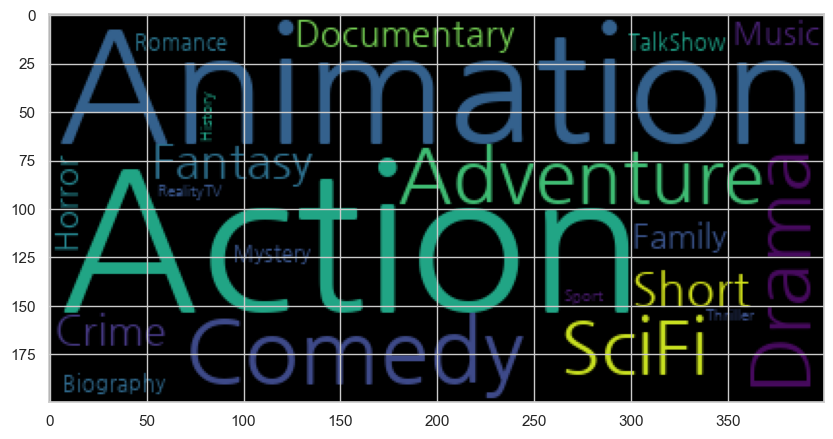

In [ ]:
word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
)
wc_figure = word_cloud.generate_from_frequencies(tag_counter)

plt.figure(figsize=(10, 8))
plt.imshow(wc_figure)
plt.show()

In [ ]:
df.head()

,ID,Movie,Genre,RunTime,Description,IMDB_Score
2,2,The Falcon and the Winter Soldier,Action Adventure Drama,50,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,Action Comedy Drama,350,Blends the style of classic sitcoms with the M...,8.1
5,5,Black Widow,Action Adventure Sci-Fi,133,A film about Natasha Romanoff in her quests be...,0.0
6,6,Avengers: Endgame,Action Adventure Drama,181,After the devastating events of Avengers: Infi...,8.4
7,7,Guardians of the Galaxy,Action Adventure Comedy,121,A group of intergalactic criminals must pull t...,8.0
